In [55]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

%matplotlib inline

In [56]:
def load_planar_dataset():
    np.random.seed(1)
    m = 1000 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality. We have 2D data
    X = np.zeros((m,D)) 
    Y = np.zeros((m,1), dtype='uint8') 
    a = 10

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

X shape:  (2, 1000)
Y shape:  (1, 1000)
X_train shape:  (2, 800)
Y_train shape:  (1, 800)
X_test shape:  (2, 200)
Y_test shape:  (1, 200)


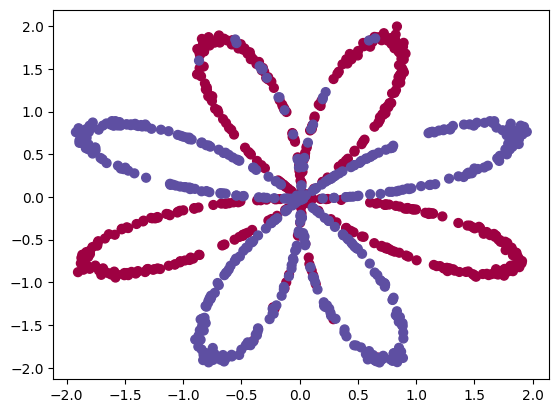

In [57]:
# loading the dataset
X, Y = load_planar_dataset()

# normalizing the dataset using Z-score
X = (X - np.mean(X, axis=1, keepdims=True)) / np.std(X, axis=1, keepdims=True)

# visualizing the dataset
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

# splitting the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)

# converting the data to the correct shape
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

In [58]:
# As the dataset is not linearly separable, we cannot use a simple logistic regression model. So we will use a neural network with one hidden layer.

def layer_sizes(X, Y):
    
    n_x = X.shape[0] # size of input layer
    n_h = 10 # size of hidden layer
    n_y = Y.shape[0] # size of output layer
    
    return (n_x, n_h, n_y)

def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [59]:
def forward_propagation(X, parameters):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1 + np.exp(-Z2))
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

def compute_cost(A2, Y):
    
    m = Y.shape[1]
    logprobs = np.multiply(Y, np.log(A2)) + np.multiply((1 - Y), np.log(1 - A2))
    cost = -np.sum(logprobs) / m
    
    cost = np.squeeze(cost)
    
    return cost

In [60]:
def backward_propagation(X, Y, parameters, cache):
    
    m = X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - A1**2)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    
    return grads

def update_parameters(parameters, grads, alpha = 1.2):
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

Cost after iteration 0: 0.693150
Cost after iteration 1000: 0.244834
Cost after iteration 2000: 0.232648
Cost after iteration 3000: 0.227462
Cost after iteration 4000: 0.208960
Cost after iteration 5000: 0.194037
Cost after iteration 6000: 0.189278
Cost after iteration 7000: 0.185706
Cost after iteration 8000: 0.182961
Cost after iteration 9000: 0.180617
f1 score train: 0.9234567901234568
f1 score test: 0.9468599033816425
Train Accuracy: 92.25 %
Test Accuracy: 94.5 %


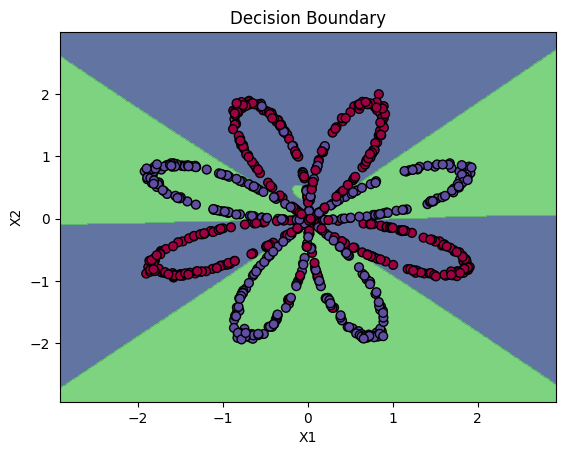

In [61]:
def model(X_train, Y_train, iters, print_cost = True):
    
    np.random.seed(2)
    n_x, n_h, n_y = layer_sizes(X_train, Y_train)
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iters):
        
        A2, cache = forward_propagation(X_train, parameters)
        cost = compute_cost(A2, Y_train)
        grads = backward_propagation(X_train, Y_train, parameters, cache)
        parameters = update_parameters(parameters, grads)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    return parameters

# Training the model
parameters = model(X_train, Y_train, iters = 10000, print_cost = True)

def predict(X, parameters):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

# Making predictions
Y_pred_train = predict(X_train, parameters)
Y_pred_test = predict(X_test, parameters)

# Calculating the accuracy and F1 score
train_accuracy = np.mean(Y_pred_train.flatten() == Y_train.flatten()) * 100
test_accuracy = np.mean(Y_pred_test.flatten() == Y_test.flatten()) * 100

print("f1 score train: {}".format(f1_score(Y_train.flatten(), Y_pred_train.flatten())))
print("f1 score test: {}".format(f1_score(Y_test.flatten(), Y_pred_test.flatten())))
print("Train Accuracy: {} %".format(train_accuracy))
print("Test Accuracy: {} %".format(test_accuracy))

# Visualizing the decision boundary
def plot_decision_boundary(parameters, X, Y):
    
    plt.title("Decision Boundary")
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = predict(np.c_[xx1.ravel(), xx2.ravel()].T, parameters)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.8)
    plt.scatter(X[0, :], X[1, :], c=Y.flatten(), s=40, edgecolor='k', cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
plot_decision_boundary(parameters, X_train, Y_train)